## Analysing Linear Polarisation

**Goal:** The goal of the notebook to derive the linear polarisation intensity and linear polarisation angle from the Stokes Q and Stokes U paramters

In [1]:
import numpy as np

from astropy.io import fits
import astropy.units as u
from astropy.utils import data
from astropy.wcs import WCS

from spectral_cube import SpectralCube

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
stokes_i_file = "MY_CASA.RLCOR_I.REPROCESSED.GCAL.FITSCUBE"
stokes_q_file = "MY_CASA.RLCOR_Q.REPROCESSED.GCAL.FITSCUBE"
stokes_u_file = "MY_CASA.RLCOR_U.REPROCESSED.GCAL.FITSCUBE"


## Information about the data

The data used is the radio image of Cassiopeia A.


In [3]:
stokes_i_file = "MY_CASA.RLCOR_I.REPROCESSED.GCAL.FITSCUBE"
stokes_q_file = "MY_CASA.RLCOR_Q.REPROCESSED.GCAL.FITSCUBE"
stokes_u_file = "MY_CASA.RLCOR_U.REPROCESSED.GCAL.FITSCUBE"


cube_i = SpectralCube.read(stokes_i_file)
cube_q = SpectralCube.read(stokes_q_file)
cube_u = SpectralCube.read(stokes_u_file)


print("--------------------------------------------------------")
print("Information about Stokes I")
print("--------------------------------------------------------")
print(cube_i)

print("--------------------------------------------------------")
print("Information about Stokes Q")
print("--------------------------------------------------------")
print(cube_q)

print("--------------------------------------------------------")
print("Information about Stokes U")
print("--------------------------------------------------------")
print(cube_u)


--------------------------------------------------------
Information about Stokes I
--------------------------------------------------------
SpectralCube with shape=(236, 512, 512) and unit=Jy / beam:
 n_x:    512  type_x: RA---SIN  unit_x: deg    range:   350.689203 deg:  351.032821 deg
 n_y:    512  type_y: DEC--SIN  unit_y: deg    range:    58.734061 deg:   58.911944 deg
 n_s:    236  type_s: FREQ      unit_s: Hz     range: 312683584.000 Hz:327983062.555 Hz
--------------------------------------------------------
Information about Stokes Q
--------------------------------------------------------
SpectralCube with shape=(236, 512, 512) and unit=Jy / beam:
 n_x:    512  type_x: RA---SIN  unit_x: deg    range:   350.689203 deg:  351.032821 deg
 n_y:    512  type_y: DEC--SIN  unit_y: deg    range:    58.734061 deg:   58.911944 deg
 n_s:    236  type_s: FREQ      unit_s: Hz     range: 312683584.000 Hz:327983062.555 Hz
--------------------------------------------------------
Information a

**Cassiopeia A Stokes I**

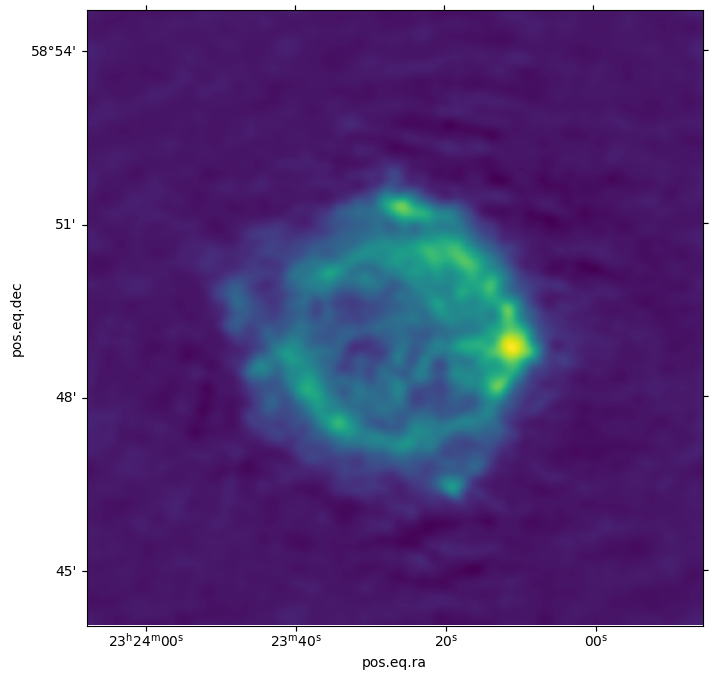

In [4]:
moment_0_i = cube_i.moment(order=0)  

wcs = WCS(cube_i.header, naxis=2)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection=wcs)
ax.imshow(moment_0_i.data, origin='lower')
plt.show()
plt.close(fig)

## Linear Polarisation

First, we take the Moment 0 of the Stokes Q and U cube

In [5]:
moment_0_q = cube_q.moment(order=0)
moment_0_u = cube_u.moment(order=0)

We derive the Linear Polarisation Intensity and Polarisation Angle as

$$
PI = \sqrt{Q^2 + U^2} \\
PA = \frac{1}{2} atan2(U, Q)
$$

In [6]:
pi = np.sqrt(moment_0_q*moment_0_q + moment_0_u*moment_0_u)
pa = 0.5 * np.arctan2(moment_0_u, moment_0_q)

# Save these for later
# pi.write('cube_p_moment0.fits')

## Quiver plot of Linear Polarisation over the Stokes I image

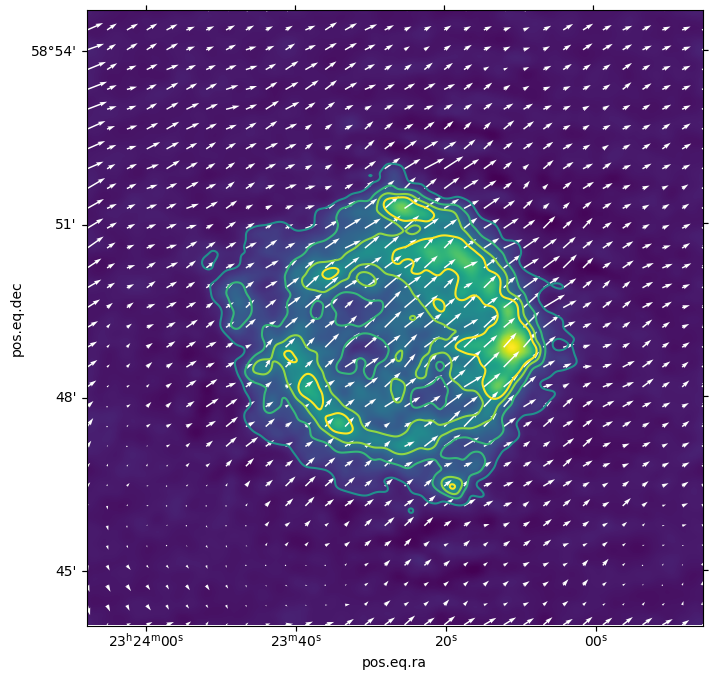

In [7]:
sz = 512

# Plotting all the arrows will be messy so we are sampling one in every 16 points
skip = 16
x = np.linspace(0,sz-1,sz//skip)
y = np.linspace(0,sz-1,sz//skip)
pi_section = np.array(pi)[:sz:skip,:sz:skip]
pa_section = np.array(pa)[:sz:skip,:sz:skip]

# Create the Vectors needed to project the Linear Polarisation
# X = PI * cos(PA)
# Y = PI * sin(PA)
u, v = pi_section * np.cos(pa_section), pi_section * np.sin(pa_section)

fig = plt.figure(figsize=(8, 8))
wcs = WCS(cube_i.header, naxis=2)

ax = fig.add_subplot(projection=wcs)

# Plot the Moment 0 of the Stokes I cube
ax.imshow(moment_0_i.data, origin='lower')

mean = np.mean(moment_0_i.data)
std  = np.std(moment_0_i.data)
# Plot contours on the Stokes I, from -3*sigma to 3*sigma
levels = np.linspace(mean - 3*std, mean + 3*std, 7)
ax.contour(moment_0_i.data, origin='lower', levels=levels)

# Plot the Quiver plot of the Linear Polarisation
ax.quiver(x, y, u, v, color = 'white')

plt.show()
plt.close(fig)